In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler

from datetime import datetime, timezone,timedelta
from ta.utils import dropna
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import KAMAIndicator, PercentagePriceOscillator, PercentageVolumeOscillator, ROCIndicator, RSIIndicator, StochasticOscillator
from ta.trend import MACD, ADXIndicator, AroonIndicator
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator

In [23]:
end = datetime.today() - timedelta(days=46)
start = datetime(2000, 9, 1)
ETH = pdr.DataReader('MSFT','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df = df[30:len(df)]
df = df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
df.rename(columns = {"Close": "price"}, inplace=True)
df

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,price,kama,ppo,pvo,roc,macd,rsi,obv,adi,adx,aroon,stoo,boll_mavg,atr
Date,,,,,,,,,,,,,,
2000-10-16,25.187500,27.159789,-5.040520,9.643245,-17.838940,-1.139903,17.960717,-9.798560e+08,-5.922451e+08,50.963362,-95.0,5.803571,29.198438,1.288931
2000-10-17,25.218750,26.779223,-5.298152,7.644222,-16.373057,-1.181762,18.321330,-8.985794e+08,-6.595886e+08,51.577473,-90.0,7.106599,28.834375,1.274990
2000-10-18,25.875000,26.704246,-5.198908,8.771409,-12.473573,-1.158031,25.706722,-7.880430e+08,-6.179580e+08,52.488953,-85.0,25.728155,28.521875,1.355794
2000-10-19,30.937500,26.990888,-3.421693,20.470591,9.392265,-0.826192,57.575357,-5.310498e+08,-3.993220e+08,48.810157,-80.0,97.727273,28.464063,1.631720
2000-10-20,32.593750,27.547329,-1.557562,20.537458,17.587373,-0.462973,63.145318,-3.706712e+08,-2.990853e+08,46.368619,20.0,94.699647,28.512500,1.693740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,212.649994,217.522259,-0.441442,0.019742,-5.130493,-0.597227,42.633777,2.709230e+09,-1.893908e+09,13.692728,-30.0,4.658740,219.084998,4.096074
2021-01-19,216.440002,217.512981,-0.384569,1.301429,-2.363763,-0.539563,49.151288,2.739711e+09,-1.870994e+09,13.378667,-30.0,29.527578,218.935999,4.114211
2021-01-20,224.339996,217.726665,-0.020414,4.408411,0.863231,-0.024508,59.484171,2.777488e+09,-1.846106e+09,13.908565,-30.0,89.530701,219.223499,4.488196


In [24]:
df.columns

Index(['price', 'kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr'],
      dtype='object')

In [25]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

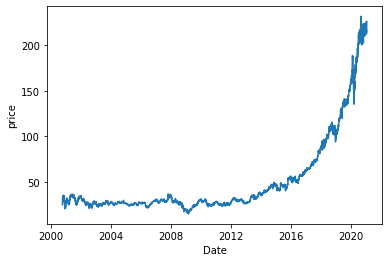

In [26]:
sns.lineplot(x=df.index, y="price", data=df);

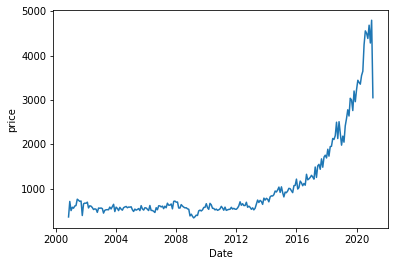

In [27]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="price", data=df_by_month);

In [28]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(4589, 17) (510, 17)


In [29]:
f_columns = ['kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr']

f_transformer = RobustScaler()
price_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
price_transformer = price_transformer.fit(train[['price']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['price'] = price_transformer.transform(train[['price']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['price'] = price_transformer.transform(test[['price']])

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [30]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [31]:
time_steps = 30

X_train, y_train = create_dataset(train, train.price, time_steps)
X_test, y_test = create_dataset(test, test.price, time_steps)

print(X_train.shape, y_train.shape)

(4559, 30, 17) (4559,)


In [32]:
X_test.shape

(480, 30, 17)

In [33]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
129/129 [==============================] - 5s 24ms/step - loss: 0.1755 - val_loss: 2.6598
Epoch 2/30
129/129 [==============================] - 3s 20ms/step - loss: 0.3988 - val_loss: 1.7323
Epoch 3/30
129/129 [==============================] - 3s 20ms/step - loss: 0.1253 - val_loss: 1.6841
Epoch 4/30
129/129 [==============================] - 3s 20ms/step - loss: 0.0603 - val_loss: 1.7390
Epoch 5/30
129/129 [==============================] - 3s 21ms/step - loss: 0.0431 - val_loss: 1.6703
Epoch 6/30
129/129 [==============================] - 3s 22ms/step - loss: 0.0294 - val_loss: 1.7969
Epoch 7/30
129/129 [==============================] - 3s 21ms/step - loss: 0.0259 - val_loss: 1.7575
Epoch 8/30
129/129 [==============================] - 3s 21ms/step - loss: 0.0266 - val_loss: 1.6543
Epoch 9/30
129/129 [==============================] - 3s 21ms/step - loss: 0.0304 - val_loss: 1.5350
Epoch 10/30
129/129 [==============================] - 3s 21ms/step - loss: 0.0384 - val_lo

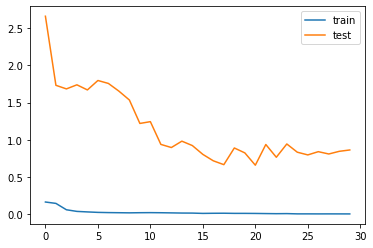

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_train_inv = price_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = price_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = price_transformer.inverse_transform(y_pred)

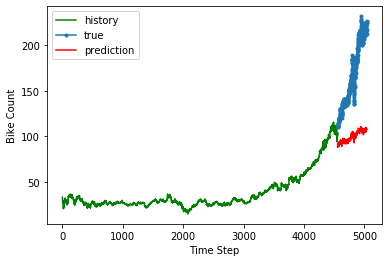

In [38]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

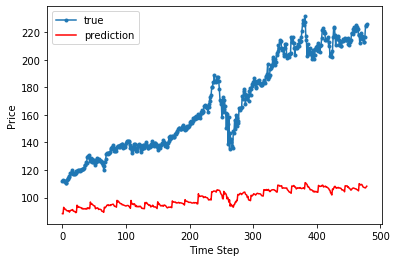

In [39]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [40]:
end = datetime.today()
start = datetime.today() - timedelta(days=56)
ETH = pdr.DataReader('MSFT','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

df = df[27:60]
df =  df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
df.rename(columns = {"Close": "price"}, inplace=True)
predict =  df.iloc[:len(df)]

f_columns = ['kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr']

f_transformer = RobustScaler()
price_transformer = RobustScaler()

price_transformer = price_transformer.fit(predict[['price']])

f_transformer = f_transformer.fit(predict[f_columns].to_numpy())

predict.loc[:, f_columns] = f_transformer.transform(predict[f_columns].to_numpy())
predict['price'] = price_transformer.transform(predict[['price']])

Xs = []
v = predict.values
Xs.append(v)

X_predict= np.array(Xs)

X_predict.shape

y_predicted = model.predict(X_predict)

y_predicted_inv = price_transformer.inverse_transform(y_predicted)

y_predicted_inv

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


array([[232.06853]], dtype=float32)